<a href="https://colab.research.google.com/github/techtour/MachineLearning/blob/master/TitanicProblem.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Loading dependencies**

In [0]:
import numpy as np                                             # to perform numerical operation
import pandas as pd                                            # to manipulate data
import matplotlib.pyplot as plt                                # to plot data into different graphs
from sklearn.linear_model import LogisticRegression            # for Machine Learning algorithms (Logistic Regression)
from sklearn.model_selection import cross_val_score            # for Cross validation score
from sklearn.ensemble import RandomForestClassifier            # for Machine Learning algorithms (Random Forest)

# **Reading the data set into pandas Dataframe**

In [0]:
titanic_df = pd.read_csv("train.csv")
titanic_df.head()                           # printing top 5 data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Size of the dataset**

In [0]:
titanic_df.shape

(891, 12)

# **Overview or breif idea on dataset**
It will print data types and number of null values for each column

In [0]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


Roughly 20% values are missing for Age and very few values are missing for Embarked. But for Cabin, major data (more than 70 %) is missing.


### **Missing Data Handling**

**1.  Delete Row/Column**

As Cabin column has more than 70% missing data,  it can not be used into the Model. We have to remove this column from feature set. 

**2.  Replace with Mean/Median/Mode**

Embarked has only 3 missing values. As this is a categorical variable, we can replace missing data with mode value ie we are going to fill missing values with most common embarkment value

Text(0, 0.5, 'Frequency')

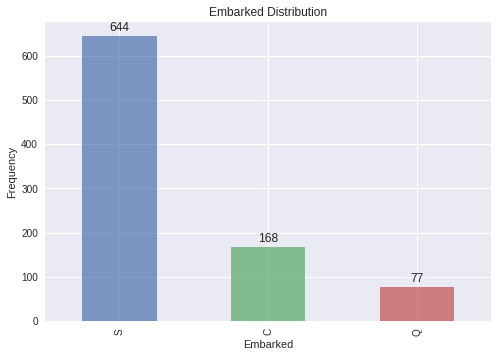

In [0]:
ax = titanic_df['Embarked'].value_counts().plot(kind='bar', alpha=0.7)
rects = ax.patches
labels = ["%d" % i for i in range(len(rects))]
for rect, label in zip(rects, labels):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height + 5, height,
            ha='center', va='bottom')
plt.title('Embarked Distribution')
plt.xlabel('Embarked')
plt.ylabel('Frequency')

In [0]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('S')

**3.  Predict Missing Value**

We can predict the null values using other features which do not have missing values. For eg we can predict missing Age values with help of machine learning algorithm where features could be Pclass, Sex, Fare etc. 

Before predicting the missing value lets explore the data to check what columns will help to predict Age and relationship between features.

# **Data Preparation**

### Lets deep dive into the data through Exploratory Data Analysis

## **Data Visualization**

Text(0, 0.5, 'Normalized Count')

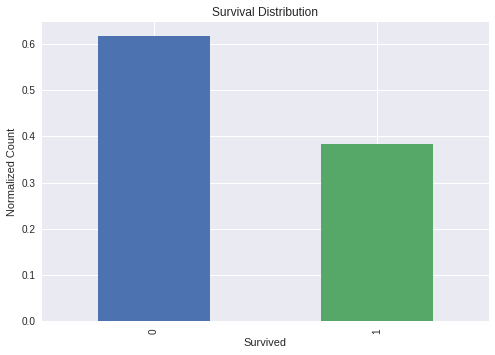

In [0]:
titanic_df['Survived'].value_counts(normalize=True).plot(kind='bar')
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Normalized Count')

It seems most of the people ie more than 60% died as per record.

Text(0, 0.5, 'Normalized Count')

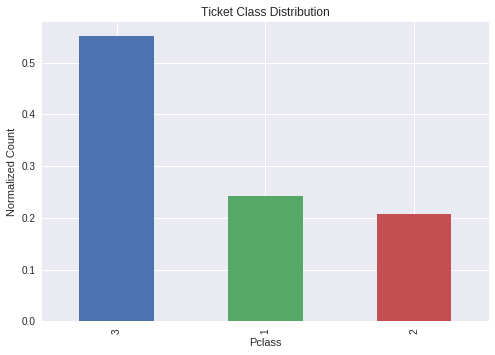

In [0]:
titanic_df['Pclass'].value_counts(normalize=True).plot(kind='bar')
plt.title('Ticket Class Distribution')
plt.xlabel('Pclass')
plt.ylabel('Normalized Count')

From this plot, we can see more than 50% passengers booked class 3 ticket.

Text(0, 0.5, 'Normalized Count')

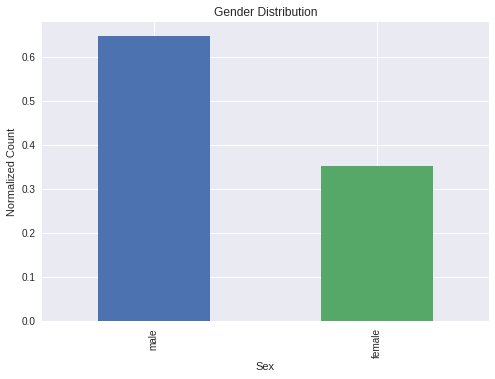

In [0]:
titanic_df['Sex'].value_counts(normalize=True).plot(kind='bar')
plt.title('Gender Distribution')
plt.xlabel('Sex')
plt.ylabel('Normalized Count')

Count of male passengers is almost twice of female passengers.

Text(0, 0.5, 'Normalized Count')

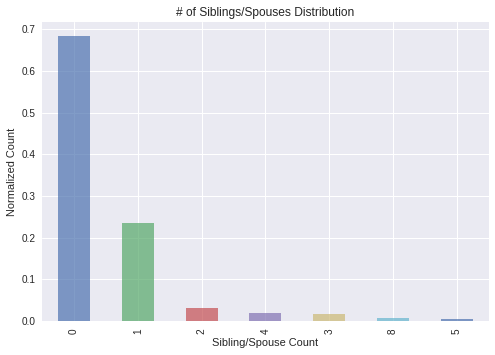

In [0]:
titanic_df['SibSp'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Siblings/Spouses Distribution')
plt.xlabel('Sibling/Spouse Count')
plt.ylabel('Normalized Count')

Most of the passengers travelled alone, that is why most frequency came for Siblings/Spouse count 0.

Text(0, 0.5, 'Normalized Count')

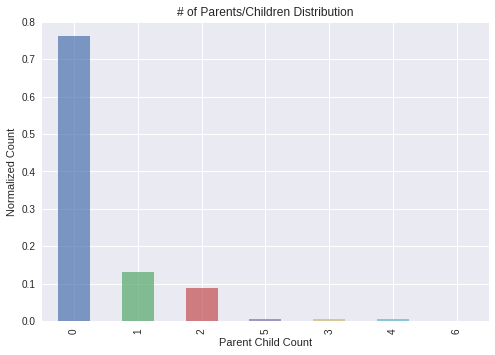

In [0]:
titanic_df['Parch'].value_counts(normalize=True).plot(kind='bar', alpha=0.7)
plt.title('# of Parents/Children Distribution')
plt.xlabel('Parent Child Count')
plt.ylabel('Normalized Count')

Most of the people neither travelled with parents or children.

Text(0, 0.5, 'Frequency')

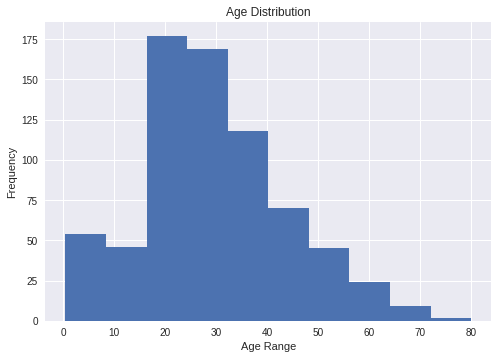

In [0]:
titanic_df['Age'].plot(kind='hist')
plt.title('Age Distribution')
plt.xlabel('Age Range')
plt.ylabel('Frequency')

As Age is continuous variable, we have used Histogram for this.

It seems, most of the people are from 18-30 years range. Before we predict missing age values, we will look into some more graphs.

Text(0, 0.5, 'Frequency')

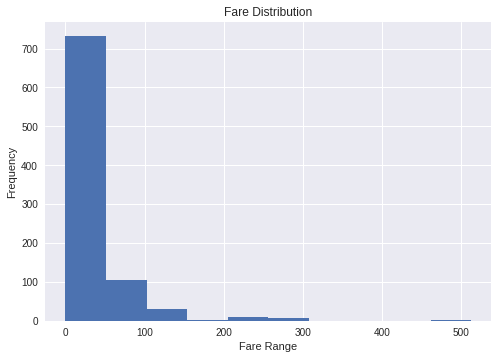

In [0]:
titanic_df['Fare'].plot(kind='hist')
plt.title('Fare Distribution')
plt.xlabel('Fare Range')
plt.ylabel('Frequency')

We can see most of the ticket price was within range of 50.

We have explored how the values for different features distributed. 
Lets see how Age variable depends on other features.

Text(0.5, 1.0, 'Age vs Female vs Class3')

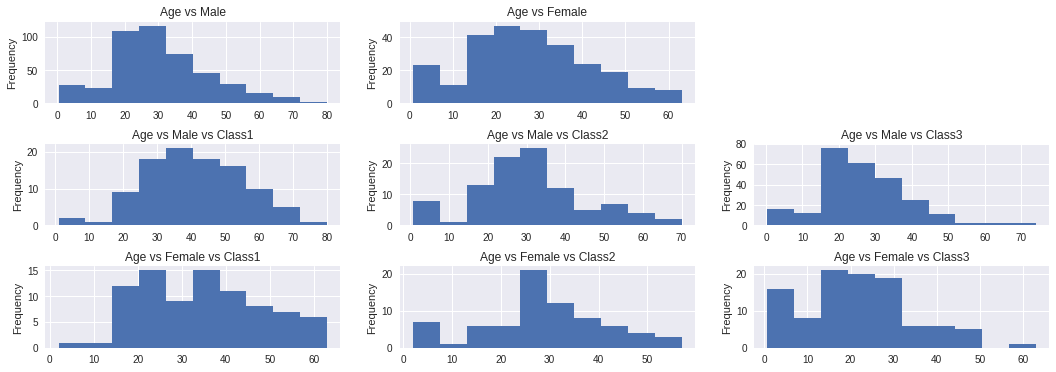

In [0]:
fig = plt.figure(figsize=(18,6))
plt.subplots_adjust(hspace=.5)

plt.subplot2grid((3,3), (0,0))
titanic_df['Age'][(titanic_df['Sex']=='male')].plot(kind='hist')
plt.title('Age vs Male')
plt.subplot2grid((3,3), (0,1))
titanic_df['Age'][(titanic_df['Sex']=='female')].plot(kind='hist')
plt.title('Age vs Female')
plt.subplot2grid((3,3), (1,0))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Male vs Class1')
plt.subplot2grid((3,3), (1,1))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Male vs Class2')
plt.subplot2grid((3,3), (1,2))
titanic_df['Age'][(titanic_df['Sex']=='male') & (titanic_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Male vs Class3')
plt.subplot2grid((3,3), (2,0))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==1)].plot(kind='hist')
plt.title('Age vs Female vs Class1')
plt.subplot2grid((3,3), (2,1))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==2)].plot(kind='hist')
plt.title('Age vs Female vs Class2')
plt.subplot2grid((3,3), (2,2))
titanic_df['Age'][(titanic_df['Sex']=='female') & (titanic_df['Pclass']==3)].plot(kind='hist')
plt.title('Age vs Female vs Class3')

From the first row it looks like Age range varies differently based on gender. And in next two rows indicate Age range distribution differs not only based on gender but also with ticket class 

We are going to calculate the median age of passengers who are grouped by ticket class and sex. And assign those median to null values present in those corresponding groups.

In [0]:
titanic_df["Age"] = titanic_df.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))

Lets try some more visuals to check how these features are related to target variable ie Survived or not.

Text(0, 0.5, 'Survived Frequency (Normalized)')

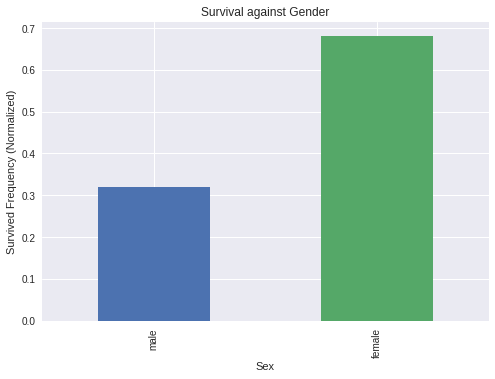

In [0]:
titanic_df['Sex'][titanic_df['Survived']==1].value_counts(normalize=True, ascending=True).plot(kind='bar')
plt.title('Survival against Gender')
plt.xlabel('Sex')
plt.ylabel('Survived Frequency (Normalized)')

It is clear that survival rate for men is much lower than womens'.

Text(0.5, 1.0, 'Ticket Class vs Survival')

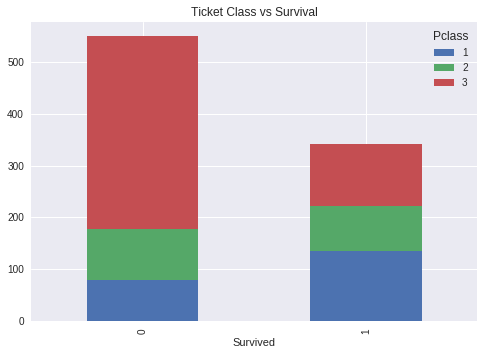

In [0]:
titanic_df.groupby(['Survived', 'Pclass']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Ticket Class vs Survival')

This plot shows that the people with first class ticket had more surviving count than dying while scenario was opposite for passengers of class 3.

Text(0, 0.5, 'Count')

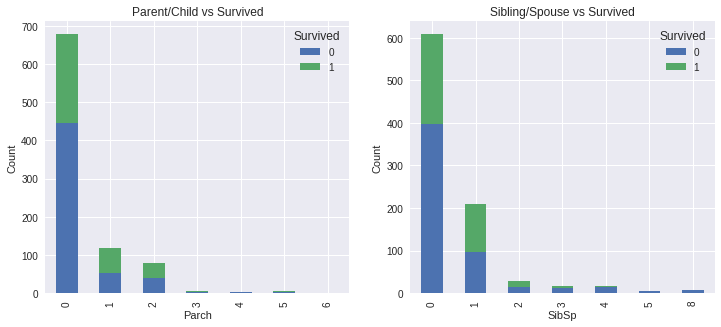

In [0]:
fig = plt.figure(figsize=(12,5))
plt.subplots_adjust(hspace=.5)

ax = plt.subplot2grid((1,2), (0,0))
titanic_df.groupby(['Parch', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Parent/Child vs Survived')
plt.ylabel('Count')

ax = plt.subplot2grid((1,2), (0,1))
titanic_df.groupby(['SibSp', 'Survived']).size().unstack().plot(kind='bar', stacked=True, ax=ax)
plt.title('Sibling/Spouse vs Survived')
plt.ylabel('Count')

These two bar chart indicate if passenger accompanied by either soupse/siblings or parents/child, chances of survival were higher than who board the ship alone.

# **Feature Engineering**

Before we train our model with this data, lets do some Feature Engineering.

Feature Engineering is a process of feature extraction from raw dataset using domain knowledge.

In previous graph we have seen, both Sibsp and Parch are having similar influence on Survival. Lets calculate if passenger travelled alone or with family. Instead of 2 separate features, lets combine SibSp and Parch and create a new feature named FamilySize.

In [0]:
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1

Text(0.5, 1.0, 'Family vs Survival')

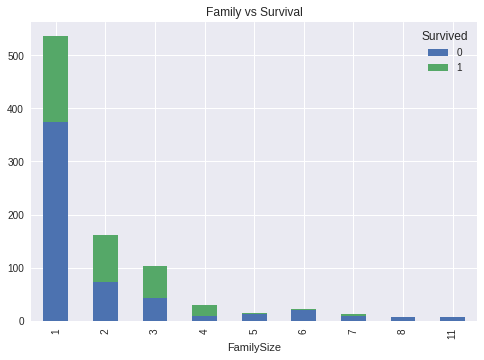

In [0]:
titanic_df.groupby(['FamilySize', 'Survived']).size().unstack().plot(kind='bar', stacked=True)
plt.title('Family vs Survival')

It says if passenger travelled with family, chances of survival were higher than people travelled alone.

We have already filled null value with corresponding median value and created new feature named FamilySize. Lets see how this modified dataset looks

In [0]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            891 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       891 non-null object
FamilySize     891 non-null int64
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


Except Cabin, none of the feature is having Null value.

Lets load the test data and check if any missing value

In [0]:
test = pd.read_csv('test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


Age, Fare and Cabin have missing value. Lets ignore Cabin as we are not going to use that feature. We have to fill the missing value with median of existing values.

And we have to add 'FamilySize', the new feature introduced as part of Feature Engineering

In [0]:
test["Age"] = test.groupby(['Sex','Pclass'])['Age'].transform(lambda x: x.fillna(x.median()))
test["Fare"] = test["Fare"].fillna(test["Fare"].dropna().median())   
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1

Lets check how test data looks like.

In [0]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            418 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           418 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
FamilySize     418 non-null int64
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


As PassengerId, Name, Ticket will not help to predict whether Survived or not, we are going to ignore those features. We have already ignored Cabin. And as we have created new feature out of SibSp and ParCh, we are not going include those features as well.

We have to apply one hot encoding for categorical variables like Sex, Embarked and Pclass. Lets create X_train and X_test.

In [0]:
X_train = titanic_df[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
X_test = test[['Pclass','Sex', 'Age', 'Fare', 'Embarked', 'FamilySize']]
labels_to_encode = ['Pclass', 'Sex', 'Embarked']
for label in labels_to_encode:
    X_train = X_train.join(pd.get_dummies(X_train[label], prefix = label))
    X_train.drop(label, axis=1, inplace=True)
for label in labels_to_encode:
    X_test = X_test.join(pd.get_dummies(X_test[label], prefix = label))
    X_test.drop(label, axis=1, inplace=True)
y = titanic_df['Survived'].values

Lets see how X_train looks like

In [0]:
X_train.head(1)

,Age,Fare,FamilySize,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,22.0,7.25,2,0,0,1,0,1,0,0,1


# **Train Model**

Its time to create model. Lets start with Logistic Regression.

In [0]:
lr_model =  LogisticRegression(solver='liblinear')

To evaluate our model we are using cross_val_score with k-fold where k = 5.

Using this model we will get the predicted Survival on test data.

In [0]:
scores = cross_val_score(lr_model, X_train, y, cv=5)
print(round(np.mean(scores*100)))
lr_model.fit(X_train,y)
predictions_lr = lr_model.predict(X_test)
submission_lr = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_lr
})
submission_lr.to_csv('titanic_lr.csv', index=False)

80.0


Upon submission this csv, score was 0.77033.

Lets try some other algorithm

Same is done using Random Forest Classifier

In [0]:
rfclr = RandomForestClassifier(n_estimators=100, max_depth = 7)
scores = cross_val_score(rfclr, X_train, y, cv=5)
print(round(np.mean(scores*100)))
rfclr.fit(X_train, y)
predictions_rf = rfclr.predict(X_test)
submission_rf = pd.DataFrame({
        "PassengerId": test["PassengerId"],
        "Survived": predictions_rf
})
submission_rf.to_csv('titanic_dt.csv', index=False)

82.0


And this scored 0.79425